## 0. Purpose

We want to study the relation between GDP and Life Expectancy at Birth (years) in the data set provided. These are only a handful of countries and a couple of years. The data is  from the World Health Organization and the World Bank.

---

## 1. Import Data and Inspect 


In [136]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
%matplotlib inline
df = pd.read_csv("all_data.csv")
warnings.filterwarnings("ignore", module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning) 

We look at the head in order to get a sense of the columns in the dataset

In [137]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In order to find the amount of rows in the dataset we inspect the shape of the dataframe

In [138]:
df.shape

(96, 4)

Now that we know the amount of rows is 96 based on the above results, we can now inspect the datatypes of each column

In [139]:
df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

At this point it would be nice to know how many unique contries and years are included in the dataset

In [140]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Since the column *Life expectancy at birth (years)* is a bit long and clumsy, we will rename it to LEABY for easier use in coding

In [141]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### 2. Explore Data with Distribution Plots

The first column that will be inspected is GDP. The following code will output a histogram of the counts of GDP. Since there are many unique values of GDP, bins will be used of continous length of 0.25 

Also the parameter `rug=True` will be used in the `displot()` function. This will create small tickmarks along the x-axis to show were each indivual observation is. This can be useful in giving us a better sense of where most values are concentrated

Based on the resulting plot it can be said that the distribution skews heavily to the right.

<Figure size 900x600 with 0 Axes>

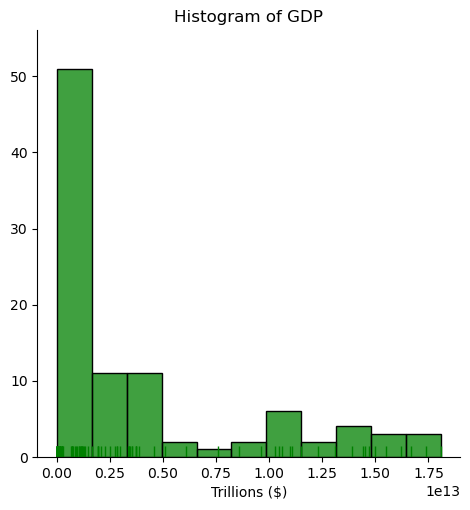

<Figure size 640x480 with 0 Axes>

In [142]:
plt.figure(figsize=(9,6))
sns.displot(df.GDP,color='green',rug = True)
plt.title("Histogram of GDP")
plt.xlabel("Trillions ($)")
plt.ylabel("")
plt.show()
plt.clf()

The GDP histogram skews to the right. There are many values below 0.25 Trillion.

<Figure size 800x600 with 0 Axes>

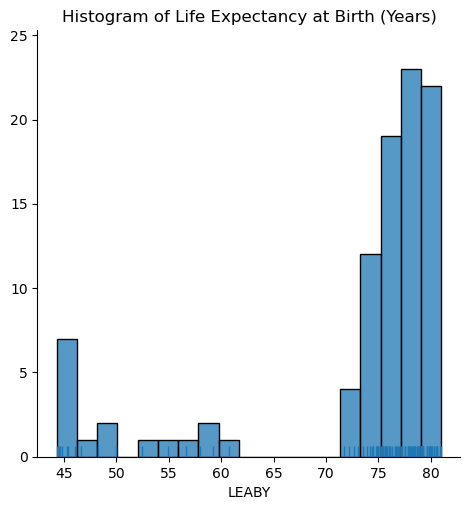

<Figure size 640x480 with 0 Axes>

In [143]:
plt.figure(figsize=(8,6))
sns.displot(df.LEABY,rug = True)
plt.title("Histogram of Life Expectancy at Birth (Years)")
plt.xlabel("LEABY")
plt.ylabel("")
plt.show()
plt.clf()

This histogram of LEABY skews to the left. There are many values greater than 75.

---
We can explore the means of these two columns. In order to do this we can create a new dataframe object called `dfMeans`. This will be made from our original dataframe `df` but we will `.drop()` the Year column since it is not needed for finding average. Then we `.groupby("Country")` to in order to group the data by Country and then use `.mean()` to find the averages of the remaining columns, in this case being GDP and LEABY. `.reset_index()` just gives this new dataframe a fresh set of indices.

In [144]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


The following code produces a bar graph using seaborne library where the x axis is LEABY and y axis is the country. The data source for this plot dataframe called df_LEABY_Means_Sorted which is the same data as dfMeans but countries are sorted from biggest to smallest according to LEABY. By having this sequential order it is easier to compare and rank countries.

Text(0.5, 1.0, 'Bar Chart of LEABY Average for each Country')

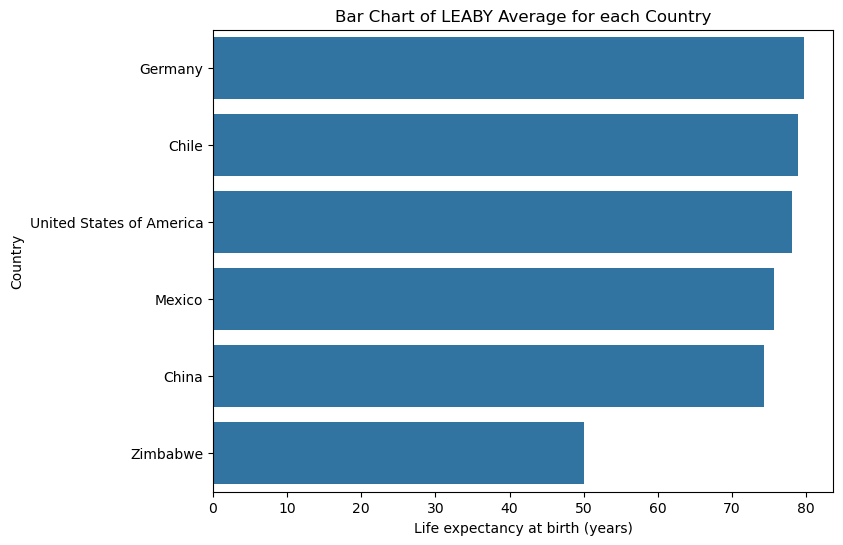

In [145]:
plt.figure(figsize=(8,6))
df_LEABY_Means_Sorted = dfMeans.sort_values(by="LEABY",ascending=False)
sns.barplot(x="LEABY", y="Country", data=df_LEABY_Means_Sorted)
plt.xlabel("Life expectancy at birth (years)");
plt.title("Bar Chart of LEABY Average for each Country")



We can do something similar to look at the GDP average grouped by Country.

Text(0.5, 1.0, 'Bar Chart of GDP Average for each Country')

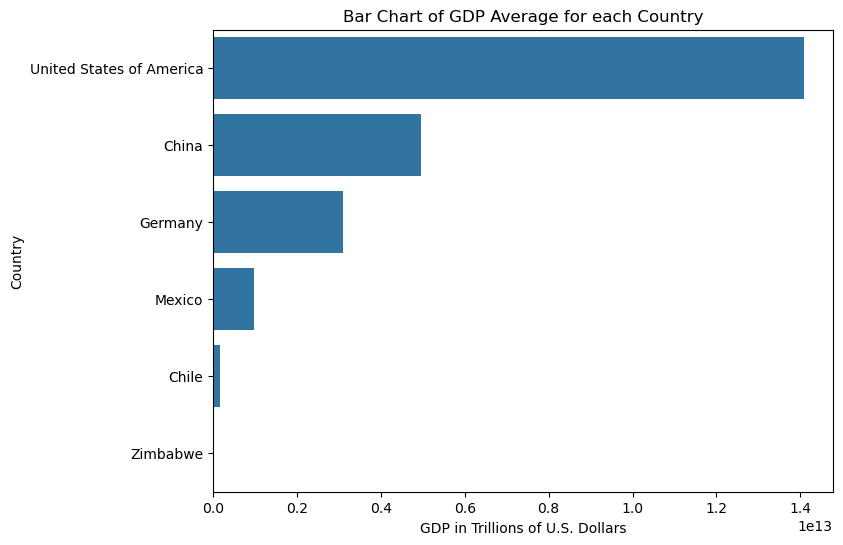

In [146]:
plt.figure(figsize=(8,6))
df_GDP_Means_Sorted = dfMeans.sort_values(by="GDP",ascending=False)
sns.barplot(x="GDP", y="Country", data=df_GDP_Means_Sorted)
plt.xlabel("GDP in Trillions of U.S. Dollars");
plt.title("Bar Chart of GDP Average for each Country")



The bar graph for LEABY shows that most countries have an average of at least 70 LEABY. Zimbabwe stands out from the rest of the countries by being significantly smaller at 50 which could explain the right skewed data from before in the histogram for LEABY


The bar graph for GDP shows that USA stands from the rest in having a much higher GDP than the rest of the countries. On the opposite side, Chile's bar is barely visible and Zimbabwe's bar cannot be seen. This would mean these countries have very small GDP compared to the rest of the other countries. 

---


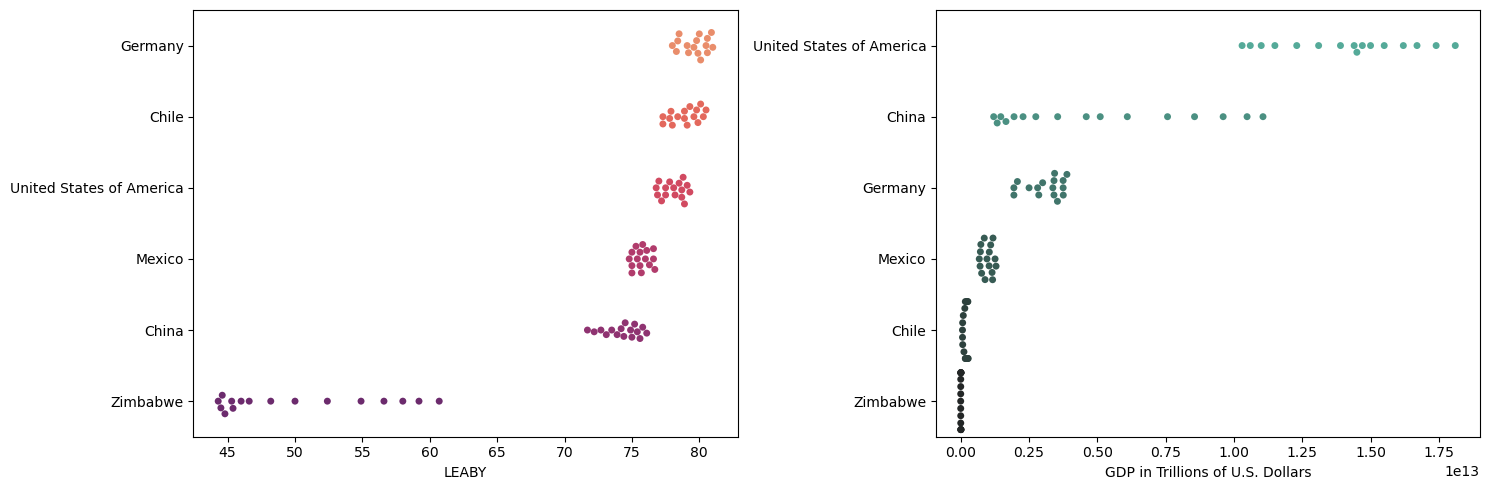

In [147]:
fig, axes = plt.subplots(1, 2,figsize=(15, 5))

axes[0] = sns.swarmplot(ax=axes[0],data=df,x="LEABY",y="Country",order=df_LEABY_Means_Sorted.Country.unique(),palette='flare')
axes[0].set_ylabel("")
axes[1] = sns.swarmplot(ax=axes[1],data=df,x="GDP",y="Country",order=df_GDP_Means_Sorted.Country.unique(),palette="dark:#5A9_r")
axes[1].set_ylabel("")
axes[1].set_xlabel("GDP in Trillions of U.S. Dollars")
plt.tight_layout()


These graphs above are swarmplots and they plot data points but with some jiggle which is why they appear like this. This allows us to better view the distribution of data points. Based on this we can see Zimbabwe has a spread out distribution for LEABY where as the other countries have similarly valued datapoints hence their clustering. For GDP, Chile and Zimbabwe have almost a vertical line of points which shows how they have similar valued datapoints. US and China have a more spread out distribution of datapoints which is why it looks more like a horizontal line. Germany and Mexico are more spread out than Chile and Zimbabwe but not as much as US and China. This is why Germany and Mexico have a more clustered look to them. 

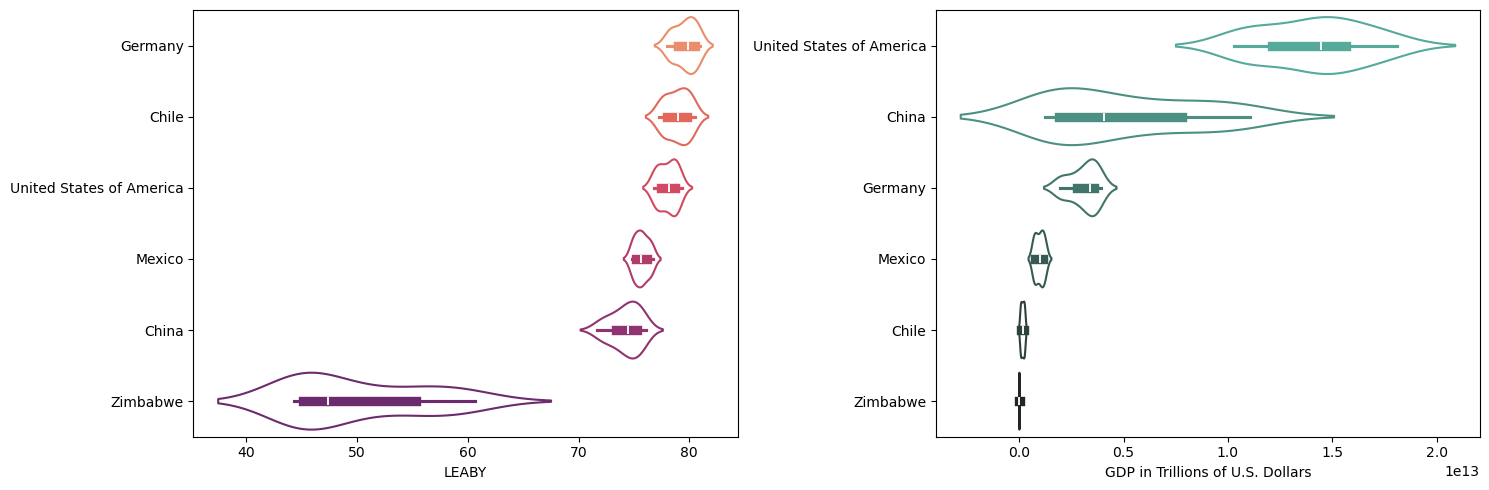

In [148]:
fig, axes = plt.subplots(1, 2,figsize=(15, 5))
axes[0] = sns.violinplot(data=df,ax=axes[0],x="LEABY",y="Country",order=df_LEABY_Means_Sorted.Country.unique(),fill=False,palette='flare')
axes[0].set_ylabel("")
axes[1] = sns.violinplot(data=df,ax=axes[1],x="GDP",y="Country",order=df_GDP_Means_Sorted.Country.unique(),fill=False,palette="dark:#5A9_r")
axes[1].set_ylabel("")
axes[1].set_xlabel("GDP in Trillions of U.S. Dollars")
plt.tight_layout()



The graphs above are violinplots which are similar to boxplots but show where values are concentrated. If the plot is thicker in a certain part this indicates more values are there. Based on what we know about where the data points are clustered from the swarmplots above, the manner in which these violinplots bulge begin to make sense.  

---
## 3. Line Charts Time Series

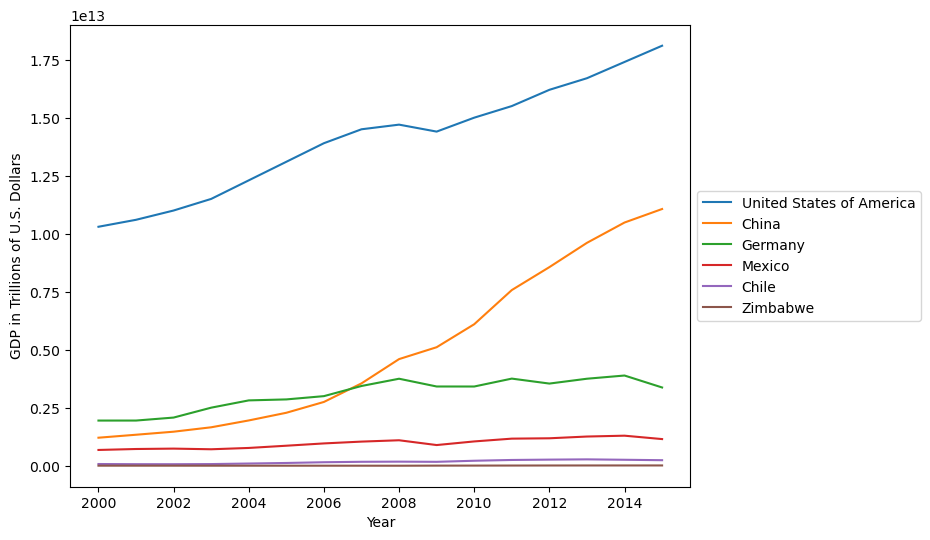

In [149]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country,hue_order=df_GDP_Means_Sorted.Country.unique())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

This is a linpeplot which is used to better understand the change in GDP for each country over the years from 2000-2015. This is all in one plot which is useful for comparing the countries to each other. However for countries with small GDP, their story can be lost due to shared y scale with other countries with much larger GDPs

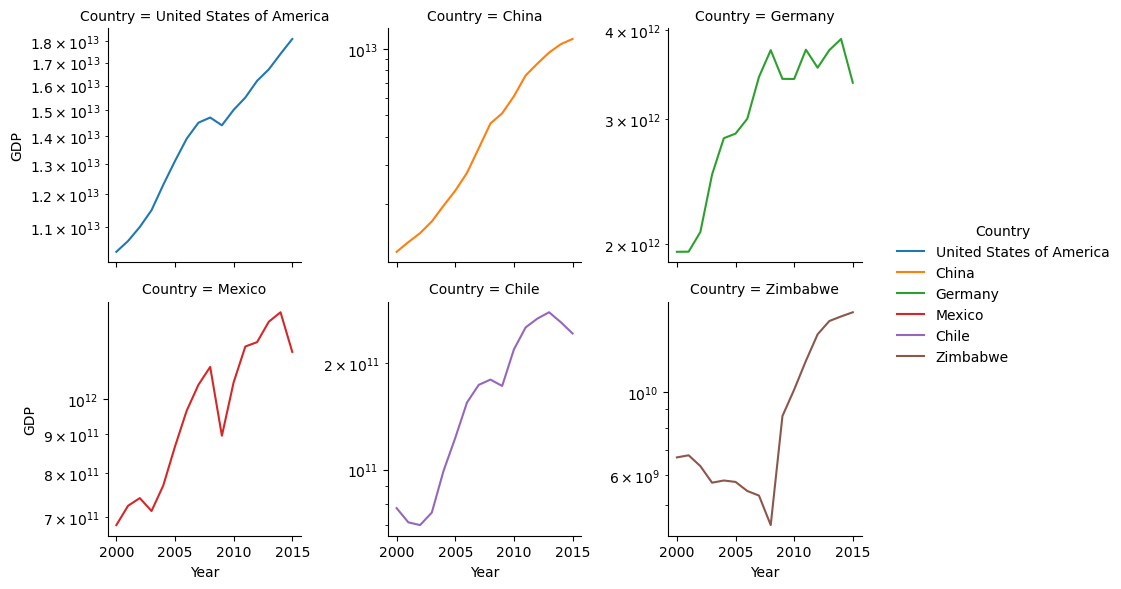

In [150]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,hue = "Country", sharey = False,
        col_order=df_GDP_Means_Sorted.Country.unique(),hue_order=df_GDP_Means_Sorted.Country.unique())
graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP").set(yscale = 'log').tight_layout())

graphGDP;

Above we have a facetgrid which allows us to plot multiple visualizations in one grid. This is done in order to better view differences in GDP change over time according to country. Here we have 6 line plots for each country where the X axis is shared and are the years from 2000 to 2015. The Y Axis is for GDP which I have set to be logarithmic. The reason for setting the yscale to logaritmic is to remind the viewer the difference in scale between GDP of countries. While USA and China have GDP's in the trillions (10<sup>13</sup>), countries like Chile and Zimbabwe are in the billions (10<sup>10</sup>) Now we are able to view the change in GDP for countries like Chile and Zimbabwe, which earlier was not as easily accessible in the previus visual.

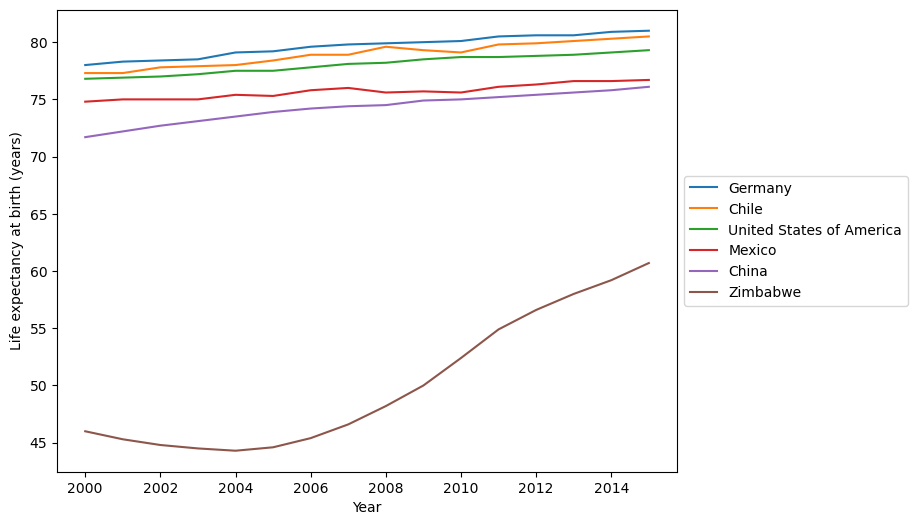

In [151]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country,hue_order=df_LEABY_Means_Sorted.Country.unique())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");


With the exception of Zimbabwe, all countries are clustered around the 70-80 LEABY range throughout the years with steady increase over time. Zimbabwe's LEABY starts just above 45 and has a large jump between 2004 that continues rising until 2015 reaching 60. This increase is the biggest we see over this stretch of time amongst all the countries listed here. 

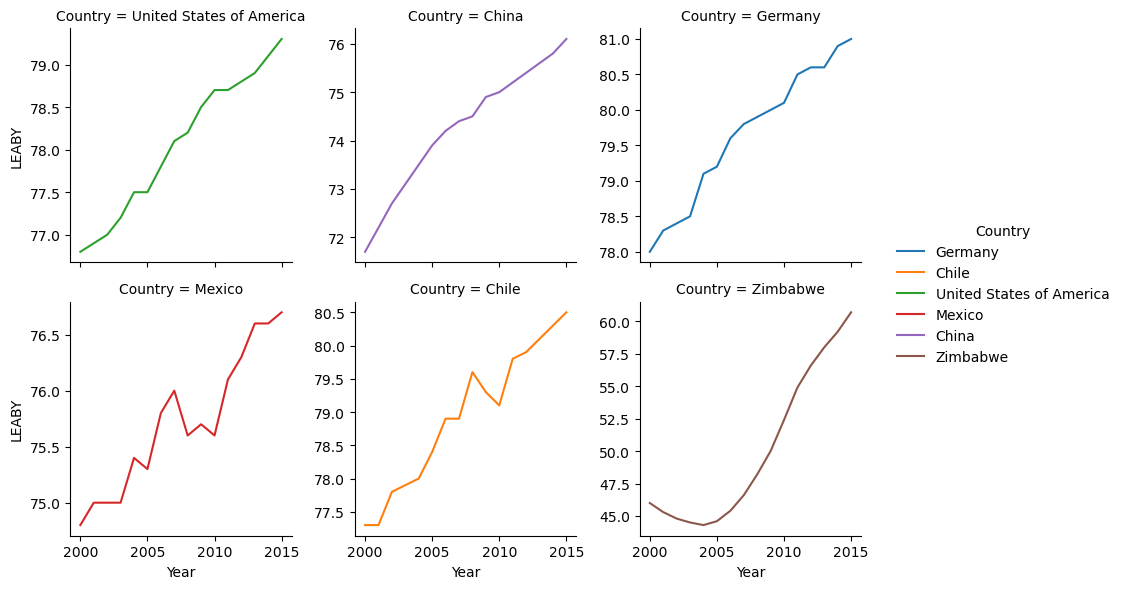

In [152]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,hue = "Country", sharey = False,
        col_order=df_GDP_Means_Sorted.Country.unique(),hue_order=df_LEABY_Means_Sorted.Country.unique())
graphGDP = (graphGDP.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","LEABY").tight_layout())

graphGDP;

If one were to take a quick glance at this grid of line plots, they could mistake that all the countries are similar in their growth. However one must pay attention to the tick marks of the y axis to get a more accurate picture. While they all have in increase of LEABY over time, Zimbabwe is the outlier in terms of its high growth rate. It is notable that Mexico and China have a dip in their LEABY around 2007.

## 4. Scatter Plots: GDP/LEABY

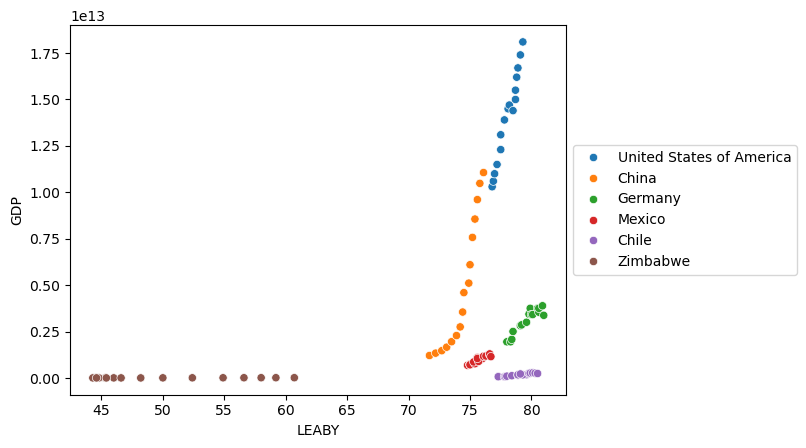

In [153]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country,hue_order=df_GDP_Means_Sorted.Country.unique()
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

The above scatter plot aims to show if there is any relation between LEABY and GDP in the countries of this dataset. If we see dots going up from left to right and arranged in a linear like fashion, we can say there is a positive linear correlation between GDP and LEABY. In other words as GDP increases this correlates with a higher LEABY. For each group of points this seems to be the case except for Zimbabwe. However we must be careful here as the x and y axis are shared amongst all the countries so the visual may be misleading.

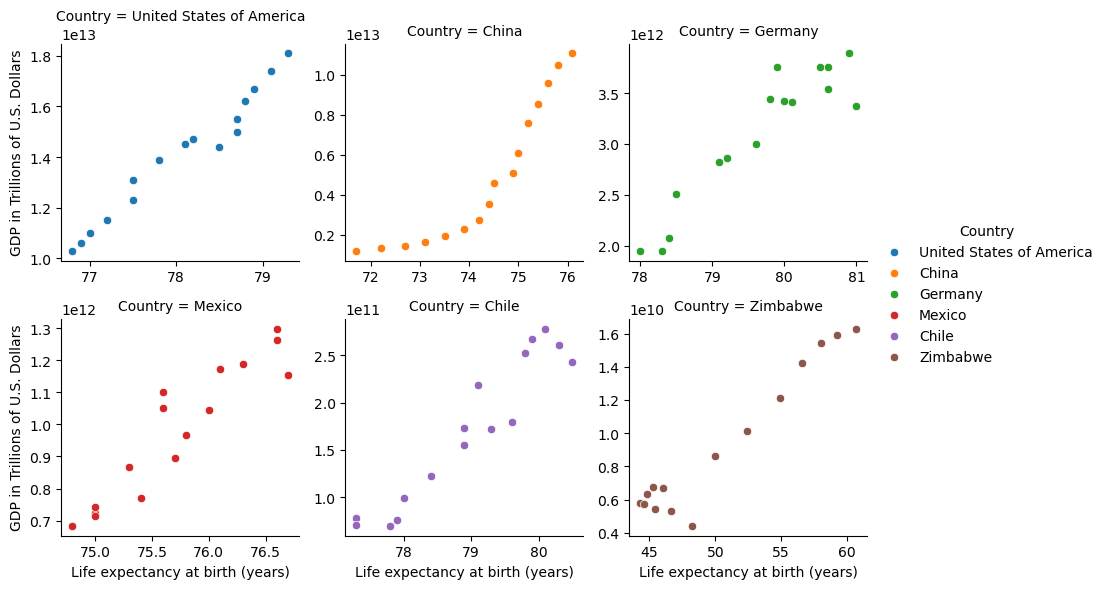

In [154]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,col_order=df_GDP_Means_Sorted.Country.unique(),
                      hue = "Country", sharey = False, sharex = False,hue_order=df_GDP_Means_Sorted.Country.unique())
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

When the scatterplot for each country is plotted seperately the correlation between GDP and LEABY becomes more apparent. Even Zimbabwe which looked flat in the previous visual shows sign of a linear correlation between these two variables. The country of China actually seems to display some exponential growth. 

---

## 5. Conclusion

Based on the data visualization presented above, one can conclude that a higher GDP correlates with a higher LEABY amongst the countries sampled in this time frame. 